# **Naive Bayes: Classifying Text**

An attempt to classify archival accessions data using multinomial Naive Bayes.
This data has been filtered to reduce the size and include all the categories. It is messy and semi-structured data; I am not expecting a high level of accuracy from the model.

In [1]:
import pandas as pd

## I am now trying this with new data...

acc_df = pd.read_excel('accessions_data_2023.xlsx') #read Excel file and convert to DataFrame
print(acc_df.head())
acc_df.tail()

   Year  Archon Code     Repository Name                             Creator  \
0  2023            1  Bath Record Office  Bath & North East Somerset Council   
1  2023            1  Bath Record Office                   Bath City Council   
2  2023            1  Bath Record Office   West Country Writers' Association   
3  2023            1  Bath Record Office        Bath City Council and others   
4  2023            1  Bath Record Office                             Various   

                                         Description Covering Dates  \
0  Records associated with the death of HM Queen ...           2022   
1  Records of waterworks, water treatment and Cle...    1890s-2010s   
2                         Letters, accounts, minutes      2000-2016   
3                       Lease of the Pump Room, Bath           1810   
4  Deeds and other papers for properties in Bath ...      1825-1981   

  ISAD(G) Ref Quantity Accessioned Collection Additional Deposit  \
0      TR0080           

,Year,Archon Code,Repository Name,Creator,Description,Covering Dates,ISAD(G) Ref,Quantity Accessioned Collection,Additional Deposit,Collection Highlight,...,Quantity linear meters 1996 and earlier,Quantity MB 1996 and earlier,Quantity linear meters 1996 to 2004,Quantity MB 1996 to 2004,Quantity linear meters 2005 to present,Quantity MB 2005 to present,Mark Up,Notes,Type Public Record,Eligible Payment
13496,2023,3014,Warrington Archives at Warrington Museum of Ar...,Warrington Chess Club.,"One album of photographs, newspaper clippings ...",1936 - 2015,WMS 3005,1 volume,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
13497,2023,3014,Warrington Archives at Warrington Museum of Ar...,Warrington and District Christian Endeavour Union,Records of the Warrington and District Christi...,1895 - 1970,WMS 3006,5 volumes 2 files,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,H,NaN,NaN,No
13498,2023,3014,Warrington Archives at Warrington Museum of Ar...,Culcheth Conservative Association,An album of photographs and associated documen...,1964 - 1966,WMS 3007,1 volume,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
13499,2023,3014,Warrington Archives at Warrington Museum of Ar...,Warrington Free Churches' Reference Group.,"Two volumes of handwritten minutes, and one bu...",1998 - 2019,WMS 3008,2 volumes 1 file,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
13500,2023,3014,Warrington Archives at Warrington Museum of Ar...,Warrington and District Free Church Ministers'...,Minutes of meetings of non-conformist ministers.,1927 - 1963,WMS 3009,2 volumes,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [3]:
acc_df.dtypes
#There are 24 columns in the dataset. 5 numerical fields and 19 text fields.
#Although the all quantity fields should be float, the template is free text and many archives add text to these fields (even when asked not to!)
#This is very messy data, but I am mainly interested in the Record creator, description and MarkUp fields.
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13501 entries, 0 to 13500
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     13501 non-null  int64  
 1   Archon Code                              13501 non-null  int64  
 2   Repository Name                          13501 non-null  object 
 3   Creator                                  12904 non-null  object 
 4   Description                              13398 non-null  object 
 5   Covering Dates                           13245 non-null  object 
 6   ISAD(G) Ref                              13180 non-null  object 
 7   Quantity Accessioned Collection          13166 non-null  object 
 8   Additional Deposit                       13501 non-null  object 
 9   Collection Highlight                     13501 non-null  object 
 10  URL Catalogue                            6459 

In [4]:
acc_df.isnull().sum() #there are a lot of null values in the dataset


Year                                           0
Archon Code                                    0
Repository Name                                0
Creator                                      597
Description                                  103
Covering Dates                               256
ISAD(G) Ref                                  321
Quantity Accessioned Collection              335
Additional Deposit                             0
Collection Highlight                           0
URL Catalogue                               7042
Keywords                                    3539
Public Record                                  0
Transferring Body                          13109
Quantity linear meters 1996 and earlier    13267
Quantity MB 1996 and earlier               13382
Quantity linear meters 1996 to 2004        13412
Quantity MB 1996 to 2004                   13432
Quantity linear meters 2005 to present     13501
Quantity MB 2005 to present                13501
Mark Up             

In [5]:
print(acc_df.columns.tolist())

print(acc_df['Mark Up'].value_counts())
#There should be 4 mark-up values - H, M, PR and S (Highlights, Manorial documents, Public Records and Sales) - as well as unmarked archival collections.

#acc_df.loc[acc_df['Mark_Up']=='Pr']
#acc_df.at[2390, 'Mark_Up']='PR' #replacing single value
#acc_df.loc[[2390]]



['Year', 'Archon Code', 'Repository Name', 'Creator', 'Description', 'Covering Dates', 'ISAD(G) Ref', 'Quantity Accessioned Collection', 'Additional Deposit', 'Collection Highlight', 'URL Catalogue', 'Keywords', 'Public Record', 'Transferring Body', 'Quantity linear meters 1996 and earlier', 'Quantity MB 1996 and earlier', 'Quantity linear meters 1996 to 2004', 'Quantity MB 1996 to 2004', 'Quantity linear meters 2005 to present', 'Quantity MB 2005 to present', 'Mark Up', 'Notes', 'Type Public Record', 'Eligible Payment']
H        1824
PR        271
H S       120
PR H       38
H M        31
S          17
H M S      13
M          12
Name: Mark Up, dtype: int64


In [9]:
acc_df['Mark Up'] = acc_df['Mark Up'].replace(['PR?', 'PN', 'P'],'PR') #replacing mutliple values
acc_df['Mark Up'] = acc_df['Mark Up'].str.strip() #to get rid of leading/trailing whitespace
acc_df['Mark Up'] = acc_df['Mark Up'].replace(['H/'], 'H')
acc_df['Mark Up'] = acc_df['Mark Up'].replace(['H S'], 'S')
acc_df['Mark Up'] = acc_df['Mark Up'].replace(['PR H'], 'PR')
acc_df['Mark Up'] = acc_df['Mark Up'].replace(['H M'], 'M')
acc_df['Mark Up'] = acc_df['Mark Up'].replace(['H M S'], 'M')
acc_df['Mark Up'].fillna('AC', inplace=True)
acc_df['Mark Up'].isnull().sum()
acc_df['Mark Up'].value_counts()

AC    11175
H      1824
PR      309
S       137
M        56
Name: Mark Up, dtype: int64

In [10]:
#Now to fill values for record creator an description fields
acc_df['Creator'].fillna('unknown', inplace=True)
acc_df['Description'].fillna('none', inplace=True)

acc_df.isnull().sum()

Year                                           0
Archon Code                                    0
Repository Name                                0
Creator                                        0
Description                                    0
Covering Dates                               256
ISAD(G) Ref                                  321
Quantity Accessioned Collection              335
Additional Deposit                             0
Collection Highlight                           0
URL Catalogue                               7042
Keywords                                    3539
Public Record                                  0
Transferring Body                          13109
Quantity linear meters 1996 and earlier    13267
Quantity MB 1996 and earlier               13382
Quantity linear meters 1996 to 2004        13412
Quantity MB 1996 to 2004                   13432
Quantity linear meters 2005 to present     13501
Quantity MB 2005 to present                13501
Mark Up             

In [11]:
acc_df = acc_df.dropna(axis='columns')
acc_df.isnull().sum()

Year                    0
Archon Code             0
Repository Name         0
Creator                 0
Description             0
Additional Deposit      0
Collection Highlight    0
Public Record           0
Mark Up                 0
Eligible Payment        0
dtype: int64

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
def show_wordcloud(data_categories, title):
    text = ' '.join(data_categories['Creator'].astype(str).tolist())
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(6,5), frameon=True)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

data_h  = acc_df[acc_df['Mark Up'] == 'H'].copy()
data_s = acc_df[acc_df['Mark Up'] == 'S'].copy()
data_pr  = acc_df[acc_df['Mark Up'] == 'PR'].copy()
data_m = acc_df[acc_df['Mark Up'] == 'M'].copy()

#illustrating the most common words in each mark-up category, but the word clouds also show distinct differences in the most common words in each category

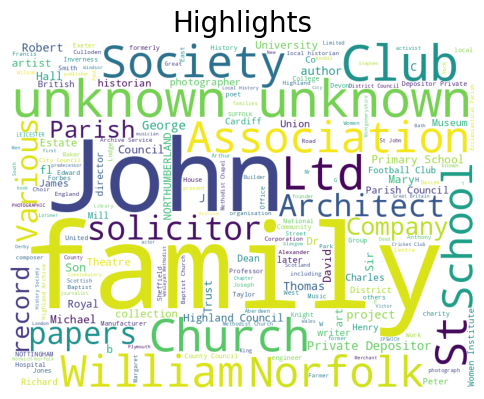

In [13]:
show_wordcloud(data_h, "Highlights")


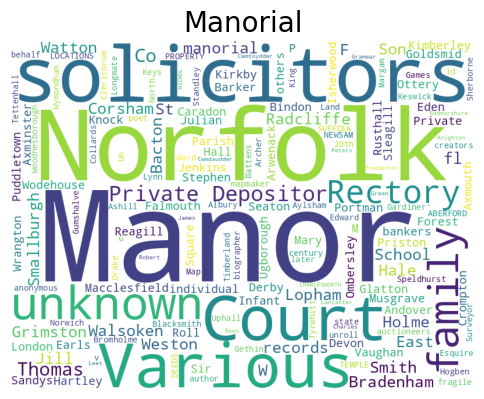

In [14]:
show_wordcloud(data_m, "Manorial")

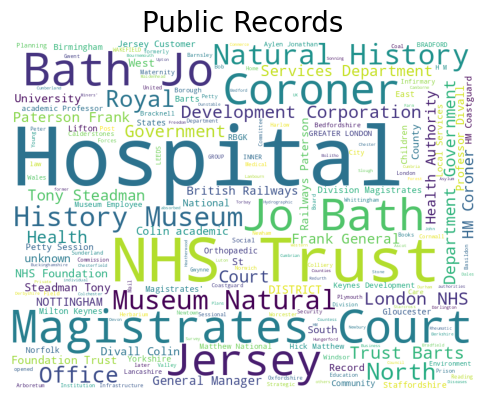

In [15]:
show_wordcloud(data_pr, "Public Records")

In [17]:
acc_df['length'] = acc_df['Creator'].apply(len)
acc_df.head()
#getting the lengths of each category

<ipython-input-17-168799a7e79f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_df['length'] = acc_df['Creator'].apply(len)


,Year,Archon Code,Repository Name,Creator,Description,Additional Deposit,Collection Highlight,Public Record,Mark Up,Eligible Payment,length
0,2023,1,Bath Record Office,Bath & North East Somerset Council,Records associated with the death of HM Queen ...,No,No,No,AC,No,34
1,2023,1,Bath Record Office,Bath City Council,"Records of waterworks, water treatment and Cle...",Yes,No,No,AC,No,17
2,2023,1,Bath Record Office,West Country Writers' Association,"Letters, accounts, minutes",Yes,No,No,AC,No,33
3,2023,1,Bath Record Office,Bath City Council and others,"Lease of the Pump Room, Bath",No,No,No,AC,No,28
4,2023,1,Bath Record Office,Various,Deeds and other papers for properties in Bath ...,Yes,No,No,AC,No,7


In [29]:
acc_df.rename(columns={'Mark Up':'Mark_Up'}, inplace=True)
acc_df.columns

Index(['Year', 'Archon Code', 'Repository Name', 'Creator', 'Description',
       'Additional Deposit', 'Collection Highlight', 'Public Record',
       'Mark_Up', 'Eligible Payment', 'length'],
      dtype='object')

Text(0.5, 0, 'Record creator length')

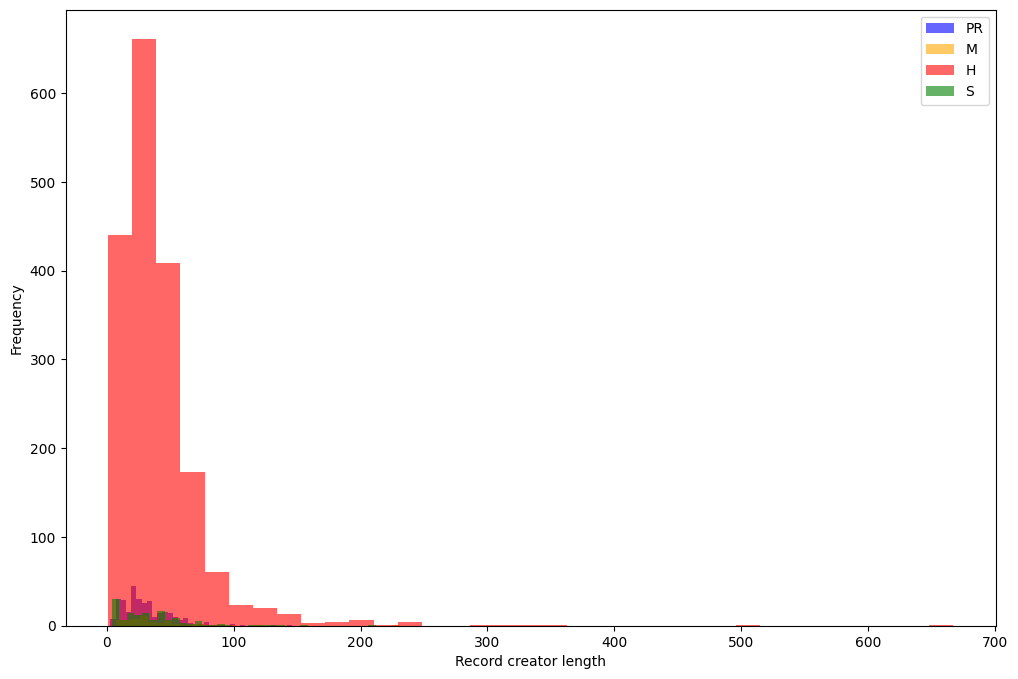

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

acc_df.rename(columns={'Mark Up':'Mark_Up'}, inplace=True)

acc_df[acc_df.Mark_Up =='PR'].length.plot(bins=35, kind='hist', color='blue', label='PR', alpha=0.6)
acc_df[acc_df.Mark_Up =='M'].length.plot(bins=35, kind='hist', color='orange',label='M', alpha=0.6)
acc_df[acc_df.Mark_Up =='H'].length.plot(bins=35, kind='hist', color='red',label='H', alpha=0.6)
acc_df[acc_df.Mark_Up =='S'].length.plot(bins=35, kind='hist', color='green',label='S', alpha=0.6)

plt.legend()
plt.xlabel("Record creator length")

In [31]:
def printClass():
  le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
  print(le_name_mapping)

from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

acc_df['Mark_Up'] = acc_df['Mark_Up'].astype(str)
Mark_Up = acc_df['Mark_Up']

# Converting string labels into numbers
Mark_Up_encoded=le.fit_transform(Mark_Up)
printClass()

acc_df['Mark_Up_encoded'] = Mark_Up_encoded
acc_df.head(10)

#encoding mark-up so the labels are represented as integers

{'AC': 0, 'H': 1, 'M': 2, 'PR': 3, 'S': 4}


,Year,Archon Code,Repository Name,Creator,Description,Additional Deposit,Collection Highlight,Public Record,Mark_Up,Eligible Payment,length,Mark_Up_encoded
0,2023,1,Bath Record Office,Bath & North East Somerset Council,Records associated with the death of HM Queen ...,No,No,No,AC,No,34,0
1,2023,1,Bath Record Office,Bath City Council,"Records of waterworks, water treatment and Cle...",Yes,No,No,AC,No,17,0
2,2023,1,Bath Record Office,West Country Writers' Association,"Letters, accounts, minutes",Yes,No,No,AC,No,33,0
3,2023,1,Bath Record Office,Bath City Council and others,"Lease of the Pump Room, Bath",No,No,No,AC,No,28,0
4,2023,1,Bath Record Office,Various,Deeds and other papers for properties in Bath ...,Yes,No,No,AC,No,7,0
5,2023,1,Bath Record Office,Royal National Hospital for Rheumatic Diseases,Photographs of the Royal Mineral Water Hospita...,Yes,Yes,Yes,PR,Yes,46,3
6,2023,1,Bath Record Office,Unknown,Talk on the Hungerford family; family tree; ph...,No,No,No,AC,No,7,0
7,2023,1,Bath Record Office,"Fairfield House, Bath",Audio files of episodes of 'They remember HIM'...,No,No,No,AC,No,21,0
8,2023,1,Bath Record Office,Gay West,"Minutes, newsletters, posters, ephemera",No,Yes,No,H,No,8,1
9,2023,1,Bath Record Office,Vaughan Jenkins family and Manor of Priston,"Harcourt Masters' estate map of Priston, busin...",No,Yes,No,M,No,43,2


In [33]:
#Naive Bayes works well as long as the categories are kept simple.
#For instance, it works well for problems involving keywords as features (e.g. spam detection), but it does not work so well when the relationship between words is important.

from sklearn.model_selection import train_test_split

acc_df['Creator'] = acc_df['Creator'].astype(str)

X = acc_df.loc[:,'Creator']
y = acc_df.loc[:,'Mark_Up_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=42)

In [34]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import numpy  as np

model = make_pipeline(TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2), stop_words='english'), MultinomialNB())
#adapt vectoizer to use logarithmic form to allow for skewness towards large values, to consider both unigrams and bigrams and to ignore stopwords
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english',
                                 sublinear_tf=True)),
                ('multinomialnb', MultinomialNB())])

In [35]:
print(X_train.count())

print(X_test.count())

print('------')

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


8100
5401
------
(8100,)
(5401,)
(8100,)
(5401,)


In [36]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model accuracy,
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(y_pred[7])


Accuracy: 0.8228105906313645
0


In [37]:
#function to test the model with a sentence/ record-creator description
# https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a

def predictions(description, model):
    all_categories = np.array(y_test)
    prediction = model.predict([description])
    return all_categories[prediction]

description = 'Epsom Cluster of Mental Hospitals'
print(predictions(description, model), description)

#It isn't that good at picking up anything other than Highlights [1]


[1] Epsom Cluster of Mental Hospitals


In [38]:
#Evaluating accuracy using cross-validation, which may give a better estimate given the disproportionate sizes of the record types
#The score is fairly close to that given by train-test-split
from sklearn.model_selection import cross_validate

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

cv1 = cross_validate(model, X, y, cv=50)
print(cv1['test_score'].mean())

0.8244572912395793


ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x7d5569dcf4f0>,
                estimator=Pipeline(steps=[('tfidfvectorizer',
                                           TfidfVectorizer()),
                                          ('multinomialnb', MultinomialNB())]))

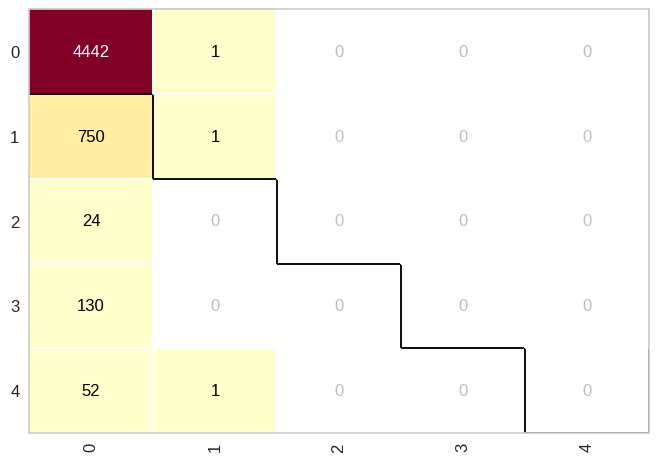

In [39]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model)
cm.fit(X_train, np.ravel(y_train))
cm.score(X_test, np.ravel(y_test))

cm
#Heat map shows that the only categories it's really predicting are H, AC and PR;
#it's also possible that with train-test-split, it's not picking up enough Manorial class records in the training set

In [40]:
y_test_true = np.ravel(y_test)
y_test_pred = np.ravel(model.predict(X_test))

confusion_matrix(y_test_true, y_test_pred)

array([[4442,    1,    0,    0,    0],
       [ 750,    1,    0,    0,    0],
       [  24,    0,    0,    0,    0],
       [ 130,    0,    0,    0,    0],
       [  52,    1,    0,    0,    0]])

In [49]:
#To get more meaningful results I am taking random samples of approx 150 from each markup value
#However, it is a small sample size and accuracy fairly remains low.

s0 = acc_df.Mark_Up[acc_df.Mark_Up.eq('H')].sample(150).index
s1 = acc_df.Mark_Up[acc_df.Mark_Up.eq('PR')].sample(150).index
s2 = acc_df.Mark_Up[acc_df.Mark_Up.eq('S')].sample(100).index
s3 = acc_df.Mark_Up[acc_df.Mark_Up.eq('M')].sample(56).index
#s4 = acc_df.Mark_Up[acc_df.Mark_Up.eq('AC')].sample(150).index - leaving out the AC category, as this is essentially 'white noise'

sample_df0 = acc_df.loc[s0.union(s1)]
sample_df1 = acc_df.loc[s2.union(s3)]
#sample_df2 = acc_df.loc[s4]

#sample_df = sample_df1.append([sample_df0,sample_df2])
sample_df = sample_df1.append([sample_df0])
sample_df.head()

#https://stackoverflow.com/questions/57405126/randomly-selecting-rows-from-a-dataframe-based-on-a-column-value

<ipython-input-49-e26afe22c201>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df1.append([sample_df0])


,Year,Archon Code,Repository Name,Creator,Description,Additional Deposit,Collection Highlight,Public Record,Mark_Up,Eligible Payment,length,Mark_Up_encoded
9,2023,1,Bath Record Office,Vaughan Jenkins family and Manor of Priston,"Harcourt Masters' estate map of Priston, busin...",No,Yes,No,M,No,43,2
219,2023,4,Bedfordshire Archives,John Henry 'Jack' Hambro (1904 - 1965) of Hamb...,Photograph album of The Hyde while Hambros Ban...,No,Yes,No,S,No,54,4
272,2023,4,Bedfordshire Archives,unknown,Lot 4 (33 charters from the reign of Henry VI ...,Yes,No,No,S,No,7,4
371,2023,5,Royal Berkshire Archives,Not known,Ascot: deed for cottage and land,No,No,No,S,No,9,4
389,2023,5,Royal Berkshire Archives,Not known,Wokingham: deed for 3a. of land,Yes,No,No,S,No,9,4


In [51]:
from sklearn.model_selection import train_test_split

X1 = sample_df.loc[:,'Creator']
y1 = sample_df.loc[:,'Mark_Up_encoded']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size= 0.3, random_state=5)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import numpy as np

model = make_pipeline(TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2), stop_words='english'), MultinomialNB())

model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model accuracy,
print("Accuracy:", metrics.accuracy_score(y_test, y_pred1))
print(y_pred1[7])


Accuracy: 0.635036496350365
3


In [52]:
def predictions(description, model):
    all_categories = np.array(y_test)
    prediction = model.predict([description])
    return all_categories[prediction]

description = 'HM Coroner for Surrey'
print(predictions(description, model),description)


[3] HM Coroner for Surrey


ConfusionMatrix(ax=<Axes: >,
                cmap=<matplotlib.colors.ListedColormap object at 0x7d5569cb1b40>,
                estimator=Pipeline(steps=[('tfidfvectorizer',
                                           TfidfVectorizer(ngram_range=(1, 2),
                                                           stop_words='english',
                                                           sublinear_tf=True)),
                                          ('multinomialnb', MultinomialNB())]))

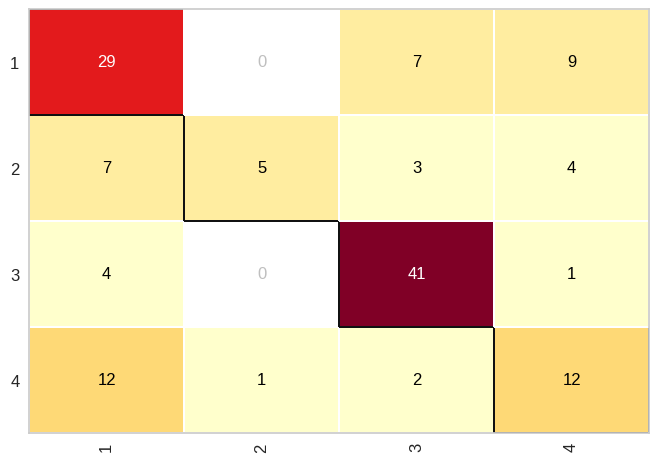

In [53]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model)
cm.fit(X_train, np.ravel(y_train))
cm.score(X_test, np.ravel(y_test))

cm
#while the accuracy is fairly low, the model is now able to predict manorial records, and does fairly well with public records and sales